Importing environment, state process function and DQN solver function

In [1]:
# environment and DQN solver
from puck_dqn import DQN_agent, puckworld_dqn
from puck_ddqn import DDQN_agent, puckworld_ddqn

# plotting packages
import pandas as pd
import matplotlib.pyplot as plt

# for state processor
from math import atan2, sqrt
import numpy as np

# for saving/loading trained agent
import pickle

# ignore tensorflow deprication warnings

Using TensorFlow backend.


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [2]:
# using watermark for reproducibility
%load_ext watermark
%watermark -d -m -v -p numpy,matplotlib,pandas

2020-02-06 

CPython 3.7.6
IPython 7.12.0

numpy 1.18.1
matplotlib 3.1.1
pandas 1.0.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit


### Puck World Implementation

Function to convert game state to np array of good and bad puck bearing and range

In [3]:
def state_bear_range(state):
    
    good_range = sqrt((state['player_x'] - state['good_creep_x'])**2 + (state['player_y'] - state['good_creep_y'])**2)
    
    bad_range = sqrt((state['player_x'] - state['bad_creep_x'])**2 + (state['player_y'] - state['bad_creep_y'])**2)
    
    range_vec = np.append(good_range, bad_range) // 1
    
    good_bearing = -atan2((state['good_creep_x'] - state['player_x']), state['good_creep_y']) - (state['player_y'])
    
    bad_bearing = -atan2((state['good_creep_x'] - state['player_x']), (state['good_creep_y']) - (state['player_y']))
    
    bearing_vec = np.append(good_bearing, bad_bearing).round(decimals = 2)
    
    state_vec = np.concatenate([range_vec, bearing_vec])
    
    return state_vec

Function to convert game state to np array of self, good and bad location and velocity

In [2]:
def state_loc_velocity(state):
    
    return np.array(list(state.values())).round(0)

Training agent

In [ ]:
puckworld_dqn(process_state = state_loc_velocity, display = True, max_iterations = 1000)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






Run: 0, exploration: 0.2, score: -26145.450000000023


Run: 1, exploration: 0.1991017979015743, score: -33495.70000000004
Run: 2, exploration: 0.19810852582337762, score: -18012.85999999996
Run: 3, exploration: 0.19712020894614707, score: -13592.000000000011
Run: 4, exploration: 0.19613682254954962, score: -25780.240000000016
Run: 5, exploration: 0.19515834203657606, score: -27346.33000000006


Training DDQN agent

In [ ]:
puckworld_ddqn(process_state = state_loc_velocity, display = True, max_iterations = 20)

Evaluate trained model

In [9]:
agent = DQN_agent(state_space=8, action_space=5)

agent.load_agent(path = '../models/model.h5')

In [10]:
agent.q_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 40)                360       
_________________________________________________________________
dense_14 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 205       
Total params: 2,205
Trainable params: 2,205
Non-trainable params: 0
_________________________________________________________________


In [11]:
agent.memory

deque([])

Evaluating trained agent performance

In [4]:
from ple.games.puckworld import PuckWorld
from ple import PLE

game = PuckWorld(width=500, height=500)
p = PLE(game, display_screen=True, state_preprocessor=process_state)
observation_space = p.state_dim[0]
action_space = len(p.getActionSet())

p.init()
nb_frames = 10000
reward = 0.0
rewards = []
for i in range(nb_frames):
    if p.game_over():
        p.reset_game()
    state = np.reshape(p.getGameState(), [1, observation_space])
    agent_action = puckworld_model.act(state)
    action = p.getActionSet()[puckworld_model.act(state)]
    #action = rng.choice([119, 97, 100, 115])
    reward = p.act(action)

NameError: name 'process_state' is not defined

Plotting rolling average rewards for trained agent

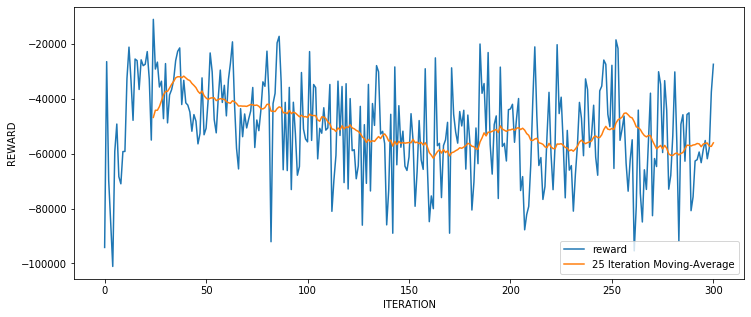

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

puck_results = pd.read_csv('results.csv')
puck_results['25-MA'] = puck_results['rewards'].rolling(window=25).mean()
puck_results['1000-MA'] = puck_results['rewards'].rolling(window=1000).mean()

plt.figure(figsize=(12,5))
plt.xlabel('ITERATION')
plt.ylabel('REWARD')
plt.plot(puck_results['rewards'], label = 'reward')
plt.plot(puck_results['25-MA'], label = '25 Iteration Moving-Average')
#plt.plot(puck_results['1000-MA'], label = '1,000 Iteration Moving-Average')
plt.legend(loc="lower right")
#plt.savefig('./puckworld_3.png')